# Breast Cancer Diagnosis

**Goal**: During [biopsy](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html) tissue samples extracted from a suspicious area are checked for cancer cells. Our goal is to develop a *supervised machine learning* model that can reliably predict whether a sample is ***benign*** or ***malignant*** based on charteristics of the sample.  A secondary goal is to identify rules for diagnosis that domain experts may be able to validate.

**Data**: We shall train and test our model using 569 labeled samples obtained from the benchmark [Wisconsin Breast Cancer Diagnosis dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).     

**Approach**: We shall use a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) classifier to achieve satisfactory classification accuracy and identify rules for diagnosis.

## Get data
First, we need to get labeled samples used for training and testing our model.    
We shall use the [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) utility to read the data into a [pandas](https://pandas.pydata.org/) dataframe.

We must *import* any module that we use.

Lines in any *code cell* are executed sequentially. Anything that appears after the symbol "#" in a line is interpreted as a comment and ignored.

In [ ]:
# To obtain the data we shall use the "load_breast_cancer" utility
# This utility is available in "sklearn.datasets".
from sklearn.datasets import load_breast_cancer

# We shall read the data into a pandas dataframe; we refer to pandas as "pd".
import pandas as pd

Next, we read the data into a pandas dataframe that we call *df*.

In [ ]:
# Read data into a dataframe that we call df
df = load_breast_cancer(as_frame=True)['frame'] # read data into dataframe df

## Explore data
Let us explore the data we use for training and testing our models.

To check the number of rows and columns in a dataframe, we checheck its shape:
- *df.shape* returns a tuple (*R*, *C*), where *R* and *C* are the number of rows and columns in *df*, respectively.

In [ ]:
# Print the shape of df
print("Shape of the dataframe: ", df.shape)

# Print the number of rows in the dataframe (first component of df.shape)
print("Number of rows = ", df.shape[0])

# Print the number of columns in the dataframe (second component of df.shape)
print("Number of columns = ", df.shape[1])

Shape of the dataframe:  (569, 31)
Number of rows =  569
Number of columns =  31


Let us look at the first *k* rows of the dataframe:

In [ ]:
k = 10 # number of rows to display
df.head(k)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


And the last *k* rows:

In [ ]:
k = 7
df.tail(k)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


The first 30 columns in the dataframe contain features describing a sample.  The last column, *target*, contains the label indicating whether the sample is **malignant** (0) or **benign** (1). Let us create a variable called *features* that contains a list of column names for the input features for our classification task. Note that *list*(*df*) returns a list with the column headers.

In [ ]:
column_headers = list(df) # list of column headers in df
features = column_headers[:-1] # all but the last column is an input feature
print(features) # print the names of the input features.

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


Let us check how many of the samples are *malignant* (labeled 0) and how many are *benign* (labeled 1). We shall count the number of samples in each class using *value_counts* and then plot the counts.

Count of samples in each class:
1    357
0    212
Name: target, dtype: int64

Histogram:


<Axes: >

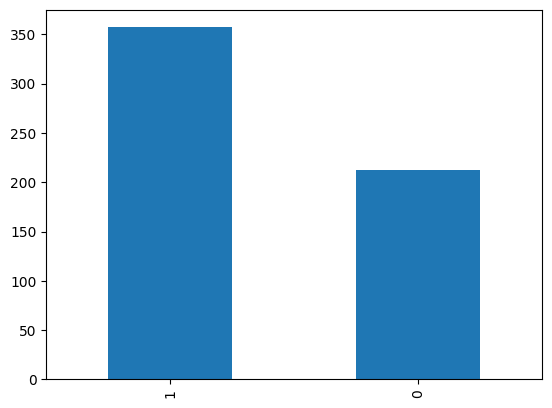

In [ ]:
print("Count of samples in each class:")
print(df["target"].value_counts())
print() # empty line

print("Histogram:")
df["target"].value_counts().plot.bar() # show counts as bar plot

## Reserve samples for testing
Trained models should be evaluated on samples that were not used for training. We import the *sklearn* function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and then use it to partition the data into training samples and test samples.

In [ ]:
from sklearn.model_selection import train_test_split # import

We shall store the the input features and the labels of the samples that we use for training in X_train and y_train, respectively. The input features and the labels of the samples that we use for testing in will be stored in X_test and y_test, respectively.

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[features], # input features
                     df['target'], # labels
                     test_size=0.2, # reserve 20% of the samples for testing
                     random_state=2024) # Specifying seed ensures replicability

Let us check the shape of *X_train*, *X_test*, *y_train*, and *y_test*.

In [ ]:
print("Number of samples for training =", len(y_train))
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print()
print("Number of samples for testing =", len(y_test))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Number of samples for training = 455
Shape of X_train: (455, 30)
Shape of y_train: (455,)

Number of samples for testing = 114
Shape of X_test: (114, 30)
Shape of y_test: (114,)


## Train a decision tree classifier
We shall use *sklearn*'s [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) algorithm. We shall also use the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) utility to plot the tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Let us train a decision tree model on the training data and use the trained model to predict the output labels for the test samples.

In [ ]:
%%time
model = DecisionTreeClassifier() # create a model object
model.fit(X_train, y_train) # train the model
y_test_predicted = model.predict(X_test) # predicted labels for test samples

CPU times: user 14.7 ms, sys: 0 ns, total: 14.7 ms
Wall time: 15.7 ms


## Evaluate the trained model
We shall evaluate the trained model by the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of our predictions for the test samples that were not used for training.

In [ ]:
from sklearn.metrics import accuracy_score # import
accuracy = accuracy_score(y_test, y_test_predicted)
print(f"Accuracy = {accuracy:0.4f}") # accuracy rounded to 4 decimal places

Accuracy = 0.9474


## Plot the trained tree
Let's see what the trained tree looks like. To create a nice looking tree we shall use [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) and the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) utility. Each path from the root node to a leaf node in the tree is a rule used for classification. Recall that our goal is to come up with as few rules as possible so that domain experts can validate the rules and be willing to use our model.

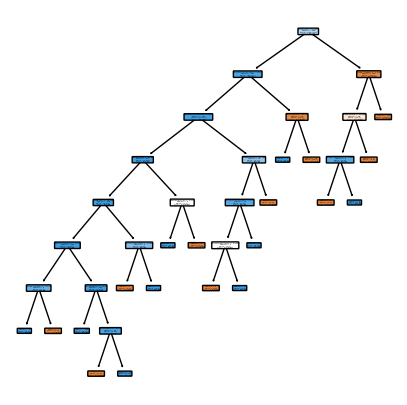

In [ ]:
from sklearn.tree import plot_tree # to plot the trained model
import matplotlib.pyplot as plt # to make the plot look nice

plt.figure(figsize=(5, 5)) # size of figure to be displayed

plot_tree(model,
          feature_names=features,
          class_names=['Malignant', 'Benign'],
          max_depth=None,
          filled=True, rounded=True, impurity=False) # plot tree

plt.show()

## Look for a better model
Our tree has quite a few leaf nodes (and hence a large number of rules used for diagnnosis). If we can achieve comparable classification accuracy using many fewer rules, domain experts may be more receptive to validating and using our model.

Let us examine the relative importance of each the 30 input features in this classification task by plotting the trained model's *feature_importances_*. We shall use [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) for our plots.

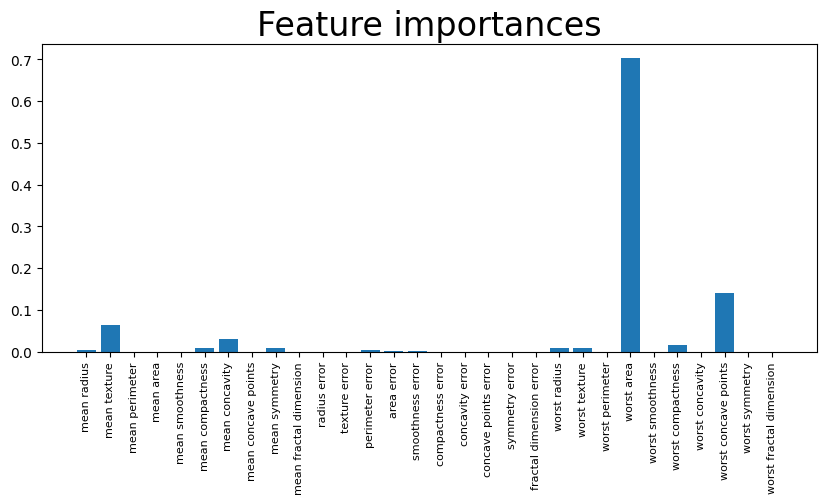

In [ ]:
import matplotlib.pyplot as plt # for plotting
plt.figure(figsize=(10, 4)) # size of figure to be displayed
plt.bar(features, model.feature_importances_) # bars show feature importances
# format the plot so that it looks nice
plt.xticks(rotation = 90, fontsize=8)
plt.title('Feature importances', fontsize=24)
plt.show() # show plot

We observe that the feature "*worst area*" is the most important one, the feature "*worst concave points*" next in importance, and "*mean texture*" somewhat helpful. The other features do not seem very relevant for this classification task. Can we obtain a much simpler model (with many fewer leaf nodes) that achieves acceptable classification accuracy?

We shall keep increasing the number of leaf nodes and check if each additional leaf node is helpful

In [ ]:
k = 2
model = DecisionTreeClassifier(max_leaf_nodes=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With {k} leaf node, Accuracy = {accuracy:0.4f}")

With 2 leaf node, Accuracy = 0.9035


In [ ]:
k = 3
model = DecisionTreeClassifier(max_leaf_nodes=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With {k} leaf node, Accuracy = {accuracy:0.4f}")

With 3 leaf node, Accuracy = 0.9298


In [ ]:
k = 6
model = DecisionTreeClassifier(max_leaf_nodes=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With {k} leaf node, Accuracy = {accuracy:0.4f}")

With 6 leaf node, Accuracy = 0.9298


In [ ]:
k = 5
model = DecisionTreeClassifier(max_leaf_nodes=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With {k} leaf node, Accuracy = {accuracy:0.4f}")

With 5 leaf node, Accuracy = 0.9298


Since we notice that increasing the number of leaf nodes from 2 to 3 helps, but any further increase isn't helpful, we shall go with a decision tree with 3 leaf nodes and plot the tree


With 3 leaf node, Accuracy = 0.9298


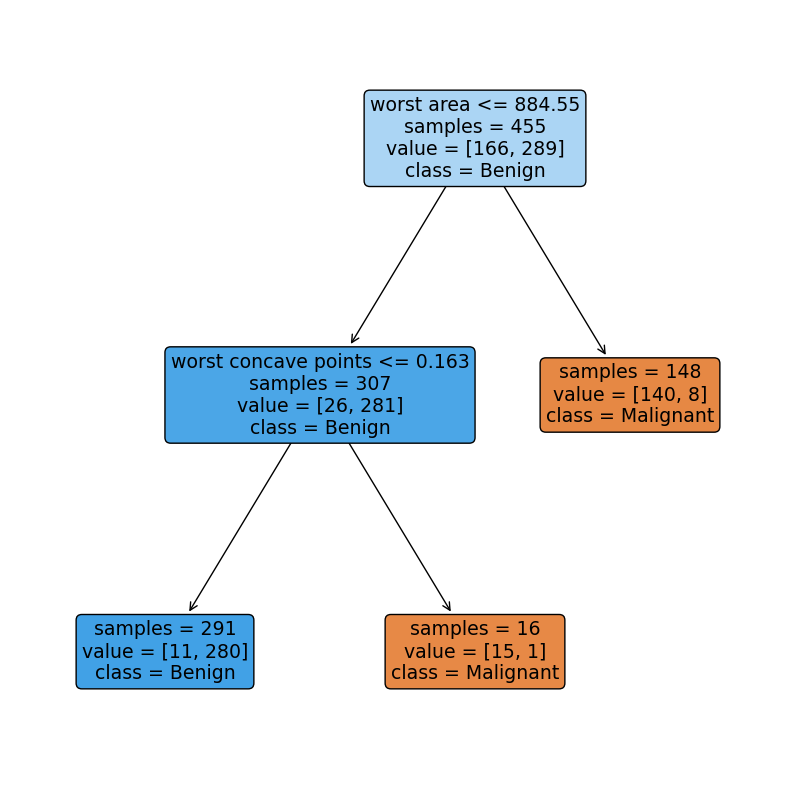

In [ ]:
k = 3 # chosen number of leaf nodes
model = DecisionTreeClassifier(max_leaf_nodes=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"With {k} leaf node, Accuracy = {accuracy:0.4f}")

plt.figure(figsize=(10, 10)) # size of figure to be displayed

plot_tree(model,
          feature_names=features,
          class_names=['Malignant', 'Benign'],
          max_depth=None,
          filled=True, rounded=True, impurity=False) # plot tree

plt.show()

What are the rules encoded in this decision tree?

1.   IF “worst area” > 844.55 THEN class = “Malignant”
2.   IF “worst area” ≤ 844.55 AND “worst concave point” > 0.163 THEN class = “Malignant”
3. IF “worst area” ≤ 844.55 AND “worst concave point” <= 0.163 THEN class = “Benign”

We can now ask domain experts to examin these rules. If these rules agree with their process of decision making, they may be willing to consult this model in determining if a given sample is benign or malignant.


## Evaluation metrics
Instead of simply looking at accuracy, we can use alternate evaluation metrics such as precision, recall and F1-score by using the scikit-learn functions [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [classisication_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html):

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,39,7
1,1,67


Several metrics are used to evaluate a model:

- Accuracy:
<br> Of the 114 test samples, what proportion of the samples are correctly classified?
<br> *Answer*: (39 + 67) / 114 = 0.9298
This is the classification *accuracy* of our model on the test samples.
- Recall
<br> Of the (39 + 7 =) 46 samples that belong to class 0, what proportion are correctly classified?
<br>*Answer*: 39 / (39 + 7) = 0.8478
This is the the *recall* of our model for class=0.
- Precision
<br> Of the (39 + 1 =) 40 samples that that are classified as 0, what proportion are correctly classified?
<br>*Answer*: 39 / (39 + 1) = 0.9750
This is the the *precision* of our model for class=0.

- F1-score:
F1-core is the harmonic mean of recall and precision. and is computed as $F1 = 2 \times precision \times recall / (precision + recall)$
Hence, the F1-score of our model for class=0 is 0.9070  

The classification report presents the accuracy, precision, recall, and f1-score for a model by comparing the predicted values to the true labels.




In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9750    0.8478    0.9070        46
           1     0.9054    0.9853    0.9437        68

    accuracy                         0.9298       114
   macro avg     0.9402    0.9166    0.9253       114
weighted avg     0.9335    0.9298    0.9289       114

